<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 15, 2021

In [ ]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#used describe function for data exploration
#df.describe(include = 'all')

In [ ]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [ ]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)
display(df)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
#df.dropna(subset = ["Year"], inplace=True)
#df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
#df = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
#df = df[~df.Group.str.contains('By Year|By Total', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)


#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
#df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
#df['Year'] = df['Year'].astype(int, errors = 'raise')
#df['Month'] = df['Month'].astype(int, errors = 'raise')

#combine Year and Month into one column
#df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

#replace condition with ICD numerical codes?
df['Condition']=df['Condition'].str.replace('Adult respiratory distress syndrome','1.0')
df['Condition']=df['Condition'].str.replace('COVID-19','2.0')
df['Condition']=df['Condition'].str.replace('Cardiac arrest','3.0')
df['Condition']=df['Condition'].str.replace('Diabetes','4.0')
df['Condition']=df['Condition'].str.replace('Hypertensive diseases','5.0')
df['Condition']=df['Condition'].str.replace('Influenza and pneumonia','6.0')
df['Condition']=df['Condition'].str.replace('Ischemic heart disease','7.0')
df['Condition']=df['Condition'].str.replace('Renal failure','8.0')
df['Condition']=df['Condition'].str.replace('Respiratory failure','9.0')
df['Condition']=df['Condition'].str.replace('Sepsis','10.0')
df['Condition'] = df['Condition'].astype(float, errors = 'raise')

#df = pd.get_dummies(df, prefix='Condition', prefix_sep='.', 
#                            columns=['Condition'])

#df = pd.get_dummies(df, prefix='AgeGroup', prefix_sep='.', 
#                            columns=['AgeGroup'])

df = df.reset_index(drop=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,ConditionGroup,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


,Condition,AgeGroup,CV19_Deaths
0,6.0,29.5,1999.0
1,6.0,39.5,5293.0
2,6.0,49.5,15615.0
3,6.0,59.5,39217.0
4,6.0,69.5,67238.0
...,...,...,...
29241,2.0,85.0,62.0
29242,2.0,85.0,23.0
29243,2.0,85.0,13.0
29244,2.0,85.0,25.0


In [ ]:
#import numpy as np

#table = df.pivot_table(index='Condition', columns='State', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
#display(table)

#import numpy as np

#table2 = df.pivot_table(index='Condition', columns='AgeGroup', values='CV19_Deaths', fill_value = 0)
#display(table)

#pd.set_option('precision', 0)
#df_single_level_cols = df.pivot_table(index=['Condition'],columns=['State','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,60,70,80,90,100]);

In [ ]:
#find a way to stack the dummy variable columns and then find a way to use corr for the 3 variables CVDeaths, AgeGroup(stacked) and Condition(Stacked)

#pd.set_option('precision', 0)
#df_single_level_cols = ndf.pivot_table(index=['Condition'],columns=['Condition','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#s2 = pd.Series(dummies.columns[np.where(dummies!=0)[1]])

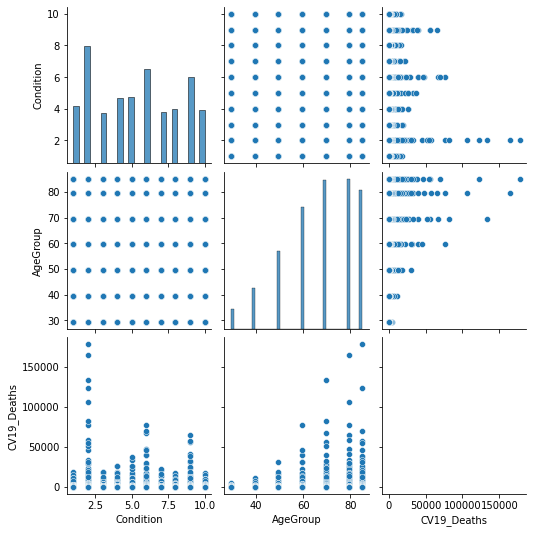

In [ ]:
#use seaborn pairplot to show correlation
import seaborn as sns

sns.pairplot(df)

In [ ]:
#use corr() function to show correlation
corr = df.corr()

display(corr)

,Condition,AgeGroup,CV19_Deaths
Condition,1.000000,0.058332,-0.027993
AgeGroup,0.058332,1.000000,0.044309
CV19_Deaths,-0.027993,0.044309,1.000000


In [ ]:
#combined data set
import numpy as np
print(df.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(df.corr().abs().nlargest(3, 'CV19_Deaths').values[:13])

Index(['CV19_Deaths', 'AgeGroup', 'Condition'], dtype='object')
[[0.02799267 0.04430923 1.        ]
 [0.05833189 1.         0.04430923]
 [1.         0.05833189 0.02799267]]


Text(0, 0.5, 'CV19_Deaths')

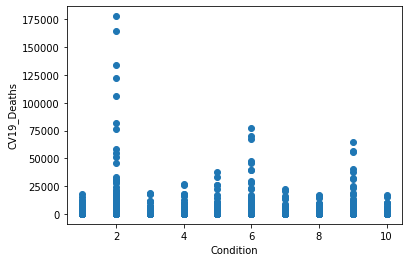

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['Condition'], df['CV19_Deaths'], marker='o')
plt.xlabel('Condition')
plt.ylabel('CV19_Deaths')

Text(0, 0.5, 'CV19_Deaths')

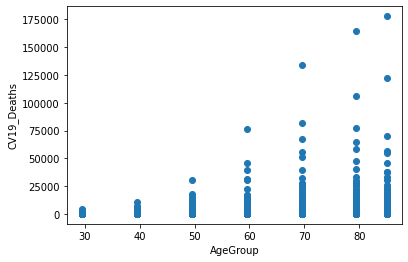

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['AgeGroup'], df['CV19_Deaths'], marker='o')
plt.xlabel('AgeGroup')
plt.ylabel('CV19_Deaths')

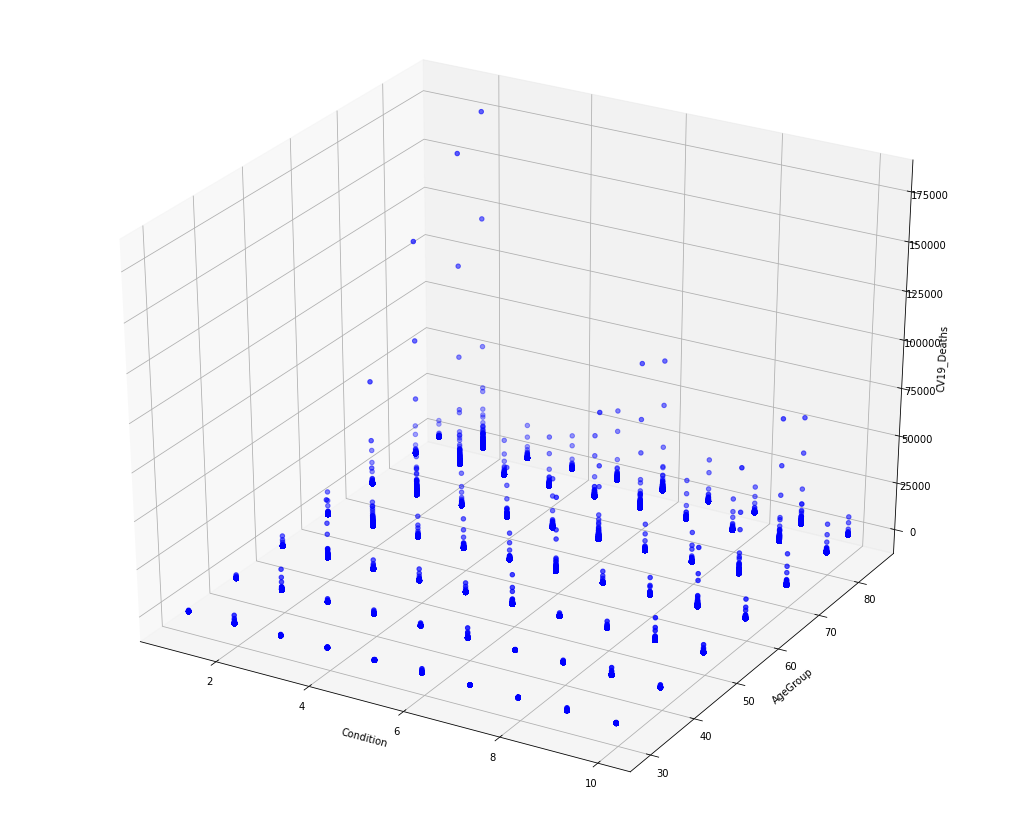

In [ ]:
#3d rendering of colums with high correlation
import numpy as np

%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Condition'],
          df['AgeGroup'],
          df['CV19_Deaths'],
          c='b')

ax.set_xlabel("Condition")
ax.set_ylabel("AgeGroup")
ax.set_zlabel("CV19_Deaths")
plt.show()


In [ ]:
##Create data frames to split the data
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']], columns = ['AgeGroup','CV19_Deaths'])
y = Condition_encoded

#import train_test_split function and assign 30% of data for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

NameError: ignored

In [ ]:
#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(75, 2)
(75,)


In [ ]:
#build the LinearRegression model and fit the train sets
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#print the incercept and data frame showing coefficient
print(model.intercept_)

pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

2.0023529411764707


,Coeff
AgeGroup,-0.043074
CV19_Deaths,0.069499


Text(0.5, 1.0, 'Actual vs Predicted')

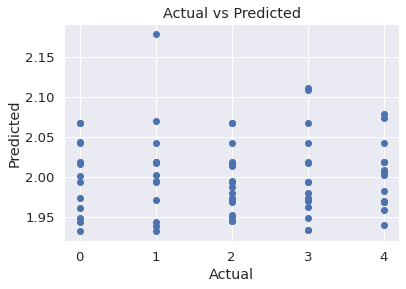

In [ ]:
#make CV-19 Deaths prediction and compare with actual values

pred = model.predict(x_test)

plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

(array([13.,  0., 13.,  0.,  6., 13.,  0., 16.,  0., 14.]),
 array([-2.06698128, -1.65424386, -1.24150645, -0.82876903, -0.41603161,
        -0.00329419,  0.40944323,  0.82218064,  1.23491806,  1.64765548,
         2.0603929 ]),
 <a list of 10 Patch objects>)

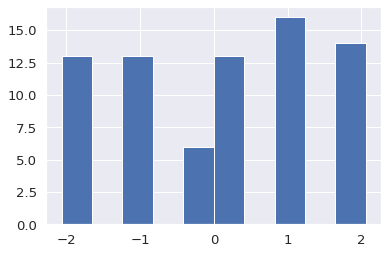

In [ ]:
#plot difference between actual values and predicted values
plt.hist(y_test - pred)

In [ ]:
#calculate MSE and R-Squared
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
print('Mean Squared Error:', mse)

print('R-Squared: %.4f' % model.score(x_test,y_test))

Mean Squared Error: 1.8302828937876676
R-Squared: -0.0044


In [ ]:
print(model.predict([[2.0, 85.0]]))

[7.82361401]


In [ ]:
#Begin Logistic model - Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#read data
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')


In [ ]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Sepsis'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Adult respiratory distress syndrome'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Renal failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'COVID-19'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

#df = pd.get_dummies(df, prefix='Condition', prefix_sep='.', 
#                            columns=['Condition'], drop_first=True)

df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
15269,Diabetes,69.5,18.0
15270,Diabetes,79.5,13.0
15271,Diabetes,79.5,12.0
15272,Diabetes,79.5,10.0


In [ ]:
#reduce size of data set to manageable size
x=500
y=29246 
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
495,Respiratory failure,79.5,673.0
496,Respiratory failure,85.0,708.0
497,Hypertensive diseases,49.5,21.0
498,Hypertensive diseases,59.5,71.0


In [ ]:
#show columns in data frame
print(df.columns)

Index(['Condition', 'AgeGroup', 'CV19_Deaths'], dtype='object')


In [ ]:
#encode Condition types
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

Condition_encoded=le.fit_transform(df['Condition'])
display(Condition_encoded)

array([2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 4, 4, 4, 4, 1, 3, 0, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,

In [ ]:
#split the data and assign to variables
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']],
                       columns = ['AgeGroup','CV19_Deaths'])
y = Condition_encoded

#split the data using 15% for test size
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)


In [ ]:
#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(425, 2)
(425,)
(75, 2)
(75,)


In [ ]:
#Apply standardscaler function
from sklearn.preprocessing import StandardScaler


# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)


In [ ]:
#import LogisticRegression function and fit to the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

#assign x test set to new variable for prediction
pred = model.predict(x_test)

In [ ]:
#import functions to show accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print(acc)
print(cm)


0.14666666666666667
[[ 0  2 12  2  1]
 [ 0  1 10  2  0]
 [ 0  0  9  3  2]
 [ 0  0 12  1  1]
 [ 0  2 14  1  0]]


Joseph S Lopez
Week 6

In [ ]:
#Begin SVM model

#import necessary Python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Sepsis'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Adult respiratory distress syndrome'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Renal failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'COVID-19'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Diabetes'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Ischemic heart disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')


row_index = df[df['CV19_Deaths'] >= 2500].index
df.drop(row_index, inplace = True)

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')


df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Respiratory failure,29.5,1378.0
2,Hypertensive diseases,29.5,369.0
3,Hypertensive diseases,39.5,1498.0
4,Influenza and pneumonia,29.5,30.0
...,...,...,...
10151,Hypertensive diseases,69.5,10.0
10152,Hypertensive diseases,79.5,15.0
10153,Hypertensive diseases,79.5,12.0
10154,Hypertensive diseases,85.0,10.0


In [ ]:
#reduce data set to manageable size

x=500
y=12545 
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Respiratory failure,29.5,1378.0
2,Hypertensive diseases,29.5,369.0
3,Hypertensive diseases,39.5,1498.0
4,Influenza and pneumonia,29.5,30.0
...,...,...,...
495,Hypertensive diseases,39.5,13.0
496,Hypertensive diseases,49.5,45.0
497,Hypertensive diseases,59.5,141.0
498,Hypertensive diseases,69.5,250.0


In [ ]:
#encode Conditions categories

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

Condition_encoded=le.fit_transform(df['Condition'])
display(Condition_encoded)

array([1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
#split the data and assign to variables
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths'],], columns = ['AgeGroup','CV19_Deaths'])
y = Condition_encoded

#split the data using 30% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=109)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


In [ ]:
#import module
#from sklearn import svm
#assign SVM classifier to variable
#classif = svm.SVC(kernel='linear')

#train the model using training sets
classif.fit(x_train, y_train)

#create prediction variable
y_pred = classif.predict(x_test)

from sklearn import svm

points = df[['AgeGroup', 'CV19_Deaths']].values
result = df['Condition']

classif = svm.SVC(kernel = 'linear')
classif.fit(points, result)

print('Vector of weights (w) = ',classif.coef_[0])
print('b = ',classif.intercept_[0])
print('Indices of support vectors =',classif.support_vectors_)
print('Number of support vector for each class =', classif.n_support_)
print('Coefficients of the support vector in the decision function =',np.abs(classif.dual_coef_))

Vector of weights (w) =  [ 0.04816116 -0.00188498]
b =  -2.383056685191425
Indices of support vectors = [[  29.5  369. ]
 [  39.5 1498. ]
 [  39.5   21. ]
 [  49.5   52. ]
 [  59.5  164. ]
 [  69.5  301. ]
 [  79.5  301. ]
 [  39.5   47. ]
 [  49.5  140. ]
 [  59.5  356. ]
 [  69.5  544. ]
 [  79.5  768. ]
 [  85.   646. ]
 [  39.5   17. ]
 [  49.5   40. ]
 [  59.5  109. ]
 [  69.5  260. ]
 [  79.5  328. ]
 [  85.   377. ]
 [  29.5   53. ]
 [  39.5  219. ]
 [  49.5  717. ]
 [  59.5 1969. ]
 [  39.5   16. ]
 [  49.5   55. ]
 [  59.5  137. ]
 [  69.5  262. ]
 [  79.5  387. ]
 [  85.   505. ]
 [  49.5   24. ]
 [  59.5   93. ]
 [  69.5  178. ]
 [  79.5  262. ]
 [  85.   481. ]
 [  59.5   36. ]
 [  69.5   74. ]
 [  39.5   13. ]
 [  49.5   69. ]
 [  59.5  185. ]
 [  69.5  283. ]
 [  29.5   28. ]
 [  39.5  117. ]
 [  49.5  387. ]
 [  59.5 1170. ]
 [  69.5 2387. ]
 [  29.5   15. ]
 [  39.5   57. ]
 [  49.5  160. ]
 [  59.5  398. ]
 [  69.5  658. ]
 [  79.5  779. ]
 [  85.   715. ]
 [  69.5   2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


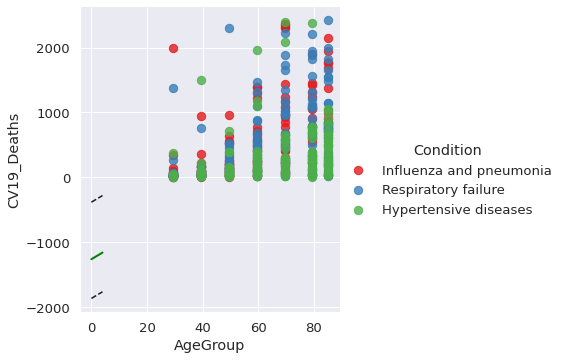

In [ ]:
#plot the hyperplane to show accuracy

w = classif.coef_[0]

slope = -w[0] / w[1]

b = classif.intercept_[0]

xx = np.linspace(0 , 4)
yy = slope * xx - (b / w[1])

s = classif.support_vectors_[0]
yy_down = slope * xx + (s[1] - slope * s[0])

s = classif.support_vectors_[-1]
yy_up = slope * xx + (s[1] - slope * s[0])

sns.lmplot('AgeGroup', 'CV19_Deaths', data=df, hue='Condition', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='green');

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [ ]:
#import metrics module
from sklearn import metrics

#check accuracy of model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.36


In [ ]:
#print precision and recall scores
print("Precision: ",metrics.precision_score(y_test, y_pred,pos_label='positive', average='micro'))
print("Recall: ",metrics.recall_score(y_test, y_pred,pos_label='positive', average='micro'))

Precision:  0.36
Recall:  0.36


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [70]:
#KNN model
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [71]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Sepsis'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Adult respiratory distress syndrome'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Renal failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'COVID-19'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Diabetes'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Ischemic heart disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
10367,Hypertensive diseases,69.5,10.0
10368,Hypertensive diseases,79.5,15.0
10369,Hypertensive diseases,79.5,12.0
10370,Hypertensive diseases,85.0,10.0


In [19]:
# reduce data set size
x=500
y=15275 
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
495,Influenza and pneumonia,79.5,219.0
496,Influenza and pneumonia,85.0,172.0
497,Respiratory failure,39.5,13.0
498,Respiratory failure,49.5,29.0


In [66]:
#split the data
x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']], columns = ['AgeGroup','CV19_Deaths'])
y = df['Condition']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(12219, 2)
(12219,)
(3055, 2)
(3055,)


In [72]:
#Explore best value of K
df = pd.get_dummies(df, columns=["Condition"])
df['AgeGroup'] = df['AgeGroup'].astype(int, errors = 'raise')
df['CV19_Deaths'] = df['CV19_Deaths'].astype(int, errors = 'raise')
df.dtypes

AgeGroup                             int64
CV19_Deaths                          int64
Condition_Hypertensive diseases      uint8
Condition_Influenza and pneumonia    uint8
Condition_Respiratory failure        uint8
dtype: object

In [59]:
print(df.columns)

Index(['AgeGroup', 'CV19_Deaths', 'Condition_Diabetes',
       'Condition_Hypertensive diseases', 'Condition_Influenza and pneumonia',
       'Condition_Ischemic heart disease', 'Condition_Respiratory failure'],
      dtype='object')


In [73]:
# OR split the data after encoding
x = df.drop(df.iloc[:,2:7], axis = 1)
y = df.iloc[:,2:7]

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(int))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=4)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(9334, 2)
(9334, 3)
(1038, 2)
(1038, 3)


In [74]:
from sklearn.neighbors import KNeighborsClassifier

#train model
model = KNeighborsClassifier(n_neighbors=3)

model.fit(x,y)

#make prediction
predicted = model.predict([[70,40000]])
print(predicted)

[[0 1 0]]


In [75]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#train the model and make prediction based on value of k
k = 1  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
pred_y = neigh.predict(x_test)
print("Accuracy of model at K = 1 is",metrics.accuracy_score(y_test, pred_y))

Accuracy of model at K = 1 is 0.3583815028901734


Maximum accuracy score is:  0.22945990180032733


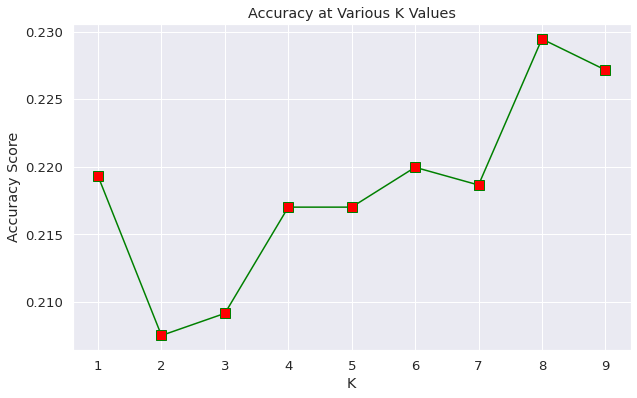

In [69]:
from sklearn import metrics

#store values in array
acc = []

#find values of K in range of 10
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'green',linestyle='solid', marker='s',markerfacecolor='red', markersize=10)
plt.title('Accuracy at Various K Values')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

#print max value from acc array
print("Maximum accuracy score is: ", max(acc))

Joseph S Lopez Week 7

In [2]:
#import necessary Python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [3]:
#begin data cleansing
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Sepsis'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Adult respiratory distress syndrome'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Renal failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'COVID-19'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Diabetes'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Ischemic heart disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
10367,Hypertensive diseases,69.5,10.0
10368,Hypertensive diseases,79.5,15.0
10369,Hypertensive diseases,79.5,12.0
10370,Hypertensive diseases,85.0,10.0


In [4]:
#reduce data set to manageable size

x=500
y=15274 
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,Influenza and pneumonia,29.5,1999.0
1,Influenza and pneumonia,39.5,5293.0
2,Influenza and pneumonia,49.5,15615.0
3,Influenza and pneumonia,59.5,39217.0
4,Influenza and pneumonia,69.5,67238.0
...,...,...,...
495,Influenza and pneumonia,79.5,219.0
496,Influenza and pneumonia,85.0,172.0
497,Respiratory failure,39.5,13.0
498,Respiratory failure,49.5,29.0


In [5]:
#encode Conditions categories

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

Condition_encoded=le.fit_transform(df['Condition'])
display(Condition_encoded)

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0,

In [7]:
#apply 10-cross fold validation to Logistic Regression

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

x = pd.DataFrame(np.c_[df['AgeGroup'], df['CV19_Deaths']], columns = ['AgeGroup','CV19_Deaths'])
y = Condition_encoded

log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, x, y, cv=10, scoring='accuracy').mean()

print(log_regress_score)

#add score to array
result = []
result.append(log_regress_score)

0.364


In [8]:
#apply 10-cross fold validation to KNN
from sklearn.neighbors import KNeighborsClassifier

cv_scores = []

folds = 10

ks = list(range(1, int(len(x) * ((folds - 1)/folds)), 2))

for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, x, y, cv=folds, scoring='accuracy').mean()
  cv_scores.append(score)

knn_score = max(cv_scores)

print(knn_score)

#add score to array
result.append(knn_score)


0.45200000000000007


In [7]:
#apply 10-cross fold validation to SVM Linear

from sklearn import svm

linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, x, y, cv=10, scoring='accuracy').mean()

print(linear_svm_score)

#add score to array
result.append(linear_svm_score)

0.41600000000000004


In [8]:
#apply 10-cross fold validation to SVM RBF Kernel

rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, x, y, cv=10, scoring='accuracy').mean()

print(rbf_score)

#add score to array
result.append(rbf_score)

0.368


In [9]:
#algorithm evaluation

#assign algorithm names to variable
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result, index = algorithms)

#assign column header
cv_mean.columns=["Accuracy"]

#print array of algorithms by accuracy score in ascending order
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.452
SVM Linear Kernel,0.416
SVM RBF Kernel,0.368
Logistic Regression,0.364


In [10]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')